In [21]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

file_to_load_merge = "population_lat_lon.csv"

merge_data_df = pd.read_csv(file_to_load_merge)

In [22]:
merge_data_df = merge_data_df.sort_values("Ave. Change", ascending=False)
top_5=merge_data_df.nlargest(5, 'Ave. Change')
merge_data_df = merge_data_df.sort_values("Ave. Change", ascending=True)
bottom_5=merge_data_df.nsmallest(5, 'Ave. Change')

In [23]:
#top 5
city = top_5.iloc[:,2]
state = top_5.iloc[:,3]
city_state = city.str.rstrip() + ", " + state
y2010 = top_5.iloc[:,26]
y2011 = top_5.iloc[:,27]
y2012 = top_5.iloc[:,28]
y2013 = top_5.iloc[:,29]
y2014 = top_5.iloc[:,30]
y2015= top_5.iloc[:,31]
y2016 = top_5.iloc[:,32]
y2017 = top_5.iloc[:,33]
ave_income_state = pd.DataFrame({"City":city_state, "2010":y2010,"2011":y2011,"2012":y2012,"2013":y2013,"2014":y2014,"2015":y2015,
                                "2016":y2016,"2017":y2017,})
ave_income_state = ave_income_state.set_index("City")
ave_income_state

,2010,2011,2012,2013,2014,2015,2016,2017
City,,,,,,,,
"Frisco, Texas",103533,105647,108428,108284,112155,114098,117642,120701
"McKinney, Texas",78256,80855,81894,81118,82988,81459,83257,87608
"Irvine, California",90939,92599,92663,90585,91999,92278,93823,95573
"Murfreesboro, Tennessee",32500,30556,30391,29946,28333,26724,26932,32250
"Midland, Texas",48843,50203,50497,50928,50433,53722,54612,58910


In [24]:
#bottom 5
city_b = bottom_5.iloc[:,2]
state_b = bottom_5.iloc[:,3]
city_state_b = city_b.str.rstrip() + ", " + state_b
y2010_b = bottom_5.iloc[:,26]
y2011_b = bottom_5.iloc[:,27]
y2012_b = bottom_5.iloc[:,28]
y2013_b = bottom_5.iloc[:,29]
y2014_b = bottom_5.iloc[:,30]
y2015_b = bottom_5.iloc[:,31]
y2016_b = bottom_5.iloc[:,32]
y2017_b = bottom_5.iloc[:,33]
ave_income_state_b = pd.DataFrame({"City":city_state_b, "2010":y2010_b,"2011":y2011_b,"2012":y2012_b,
                                 "2013":y2013_b,"2014":y2014_b,"2015":y2015_b,"2016":y2016_b,"2017":y2017_b})
ave_income_state_b = ave_income_state_b.set_index("City")
years = ave_income_state_b.iloc[0,:]
years = years.index
ave_income_state_b

,2010,2011,2012,2013,2014,2015,2016,2017
City,,,,,,,,
"Flint, Michigan",27199,26621,26339,24834,24679,24862,25650,26330
"Shreveport, Louisiana",35613,36803,38465,38633,38413,38583,38056,37390
"Detroit, Michigan",28357,27862,26955,26325,26095,25764,26249,27838
"Jackson, Mississippi",32917,31063,37083,34750,29764,31232,31096,30694
"Erie, Pennsylvania",38796,38047,36905,42386,40313,39519,39191,43929


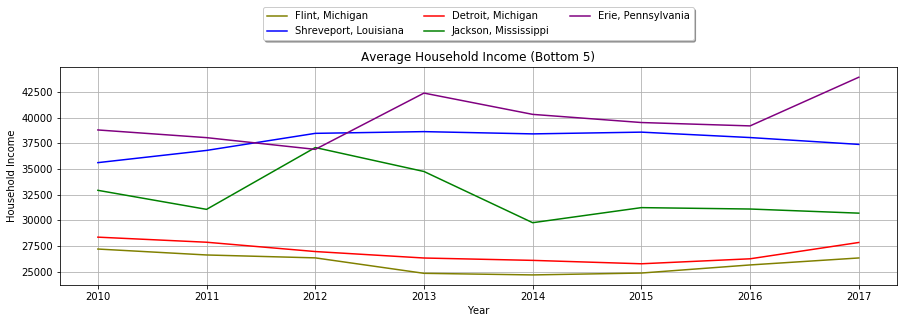

In [25]:
#size
plt.subplots(figsize=(15,4))
plt.plot( years, ave_income_state_b.iloc[0,:], color='olive',label="Flint, Michigan")
plt.plot( years, ave_income_state_b.iloc[1,:], color='blue',label="Shreveport, Louisiana")
plt.plot( years, ave_income_state_b.iloc[2,:], color='red',label="Detroit, Michigan")
plt.plot( years, ave_income_state_b.iloc[3,:], color='green',label="Jackson, Mississippi")
plt.plot( years, ave_income_state_b.iloc[4,:], color='purple',label="Erie, Pennsylvania")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=3, fancybox=True, shadow=True)
plt.title("Average Household Income (Bottom 5)")
plt.xlabel("Year")
plt.ylabel("Household Income")
plt.grid()

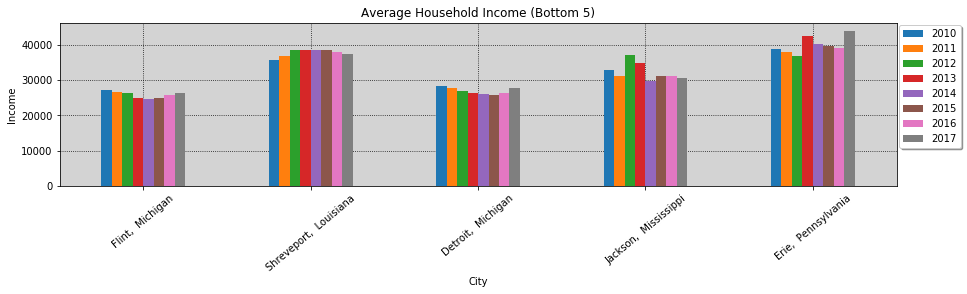

In [26]:
#size remove figsize
newws = ave_income_state_b.plot.bar(rot=40,figsize=(15,3),zorder=2)
newws.set_facecolor("lightgrey")
plt.legend(loc='upper center', bbox_to_anchor=(1.04, 1.02), ncol=1, fancybox=True, shadow=True)
plt.ylabel("Income")
plt.grid(zorder=0, color="black",linestyle="dotted")
plt.title("Average Household Income (Bottom 5)")
plt.show()

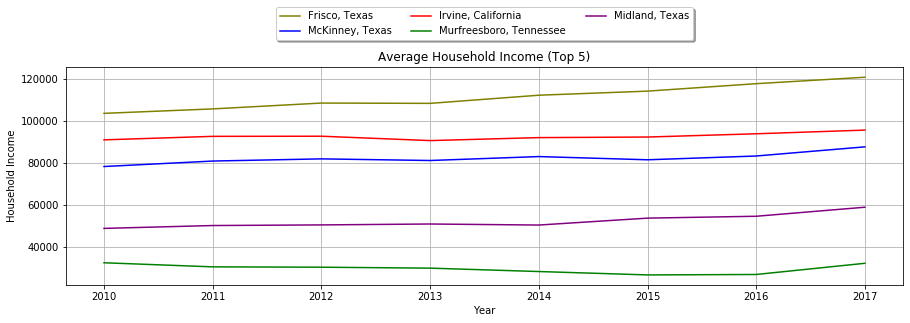

In [27]:
plt.subplots(figsize=(15,4))
plt.plot( years, ave_income_state.iloc[0,:], color='olive',label="Frisco, Texas")
plt.plot( years, ave_income_state.iloc[1,:], color='blue',label="McKinney, Texas")
plt.plot( years, ave_income_state.iloc[2,:], color='red',label="Irvine, California")
plt.plot( years, ave_income_state.iloc[3,:], color='green',label="Murfreesboro, Tennessee")
plt.plot( years, ave_income_state.iloc[4,:], color='purple',label="Midland, Texas")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=3, fancybox=True, shadow=True)
plt.title("Average Household Income (Top 5)")
plt.xlabel("Year")
plt.ylabel("Household Income")
plt.grid()

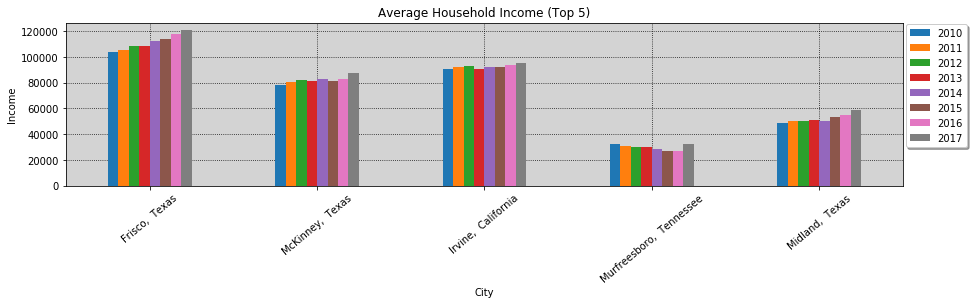

In [28]:
neww = ave_income_state.plot.bar(rot=40,figsize=(15,3),zorder=2)
neww.set_facecolor("lightgrey")
plt.legend(loc='upper center', bbox_to_anchor=(1.04, 1.02), ncol=1, fancybox=True, shadow=True)
plt.ylabel("Income")
plt.grid(zorder=0, color="black",linestyle="dotted")
plt.title("Average Household Income (Top 5)")
plt.show()

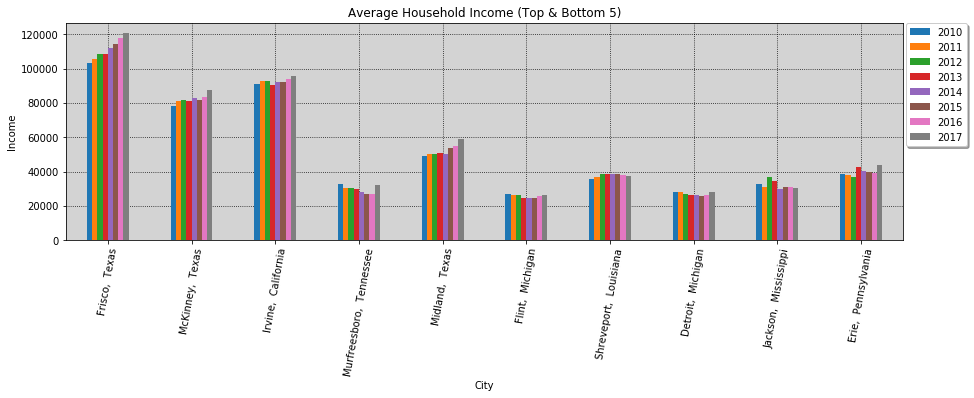

In [29]:
new = pd.concat([ave_income_state, ave_income_state_b])
news=new.plot.bar(rot=80,figsize=(15,4),zorder=2)
news.set_facecolor("lightgrey")
plt.legend(loc='upper center', bbox_to_anchor=(1.04, 1.02), ncol=1, fancybox=True, shadow=True)
plt.ylabel("Income")
plt.grid(zorder=0, color="black",linestyle="dotted")
plt.title("Average Household Income (Top & Bottom 5)")
plt.show()

In [30]:
#skatter plotts for each year with all cities over 100k